In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans

In [2]:
# reading in the main dataframe
data_dir = "../../data/"
df = pd.read_csv(data_dir+'skillshare_combined.csv')
print(df.shape)
df.head()

(475448, 52)


,user_uid,create_time,success,cancellation_time,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,trial_start_day,...,day-31,comment_volume,comment_score,discussion_volume,discussion_score,follow_volume,projects_volume,projects_score,review_volume,rating_avg
0,23692129,2022-01-01 00:00:02,0,2022-01-31 19:46:01,2,2,0,10,30,2022-01-01,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23674285,2022-01-01 00:00:27,0,0.0,-1,-1,0,2,116,2022-01-01,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16119588,2022-01-01 00:01:19,1,0.0,1,5,0,10,30,2022-01-01,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23693101,2022-01-01 00:01:42,0,2022-02-23 17:37:56,2,2,0,16,55,2022-01-01,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23692349,2022-01-01 00:02:04,1,0.0,2,2,0,16,55,2022-01-01,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.keys()

Index(['user_uid', 'create_time', 'success', 'cancellation_time',
       'payment_provider_cat_codes', 'payment_ux_cat_codes',
       'trial_length_offer_cat_codes', 'sub_utm_channel_cat_codes',
       'sub_utm_source_cat_codes', 'trial_start_day', 'trial_end_day',
       'is_cancel_during_trial', 'day-1', 'day-2', 'day-3', 'day-4', 'day-5',
       'day-6', 'day-7', 'day-8', 'day-9', 'day-10', 'day-11', 'day-12',
       'day-13', 'day-14', 'day-15', 'day-16', 'day-17', 'day-18', 'day-19',
       'day-20', 'day-21', 'day-22', 'day-23', 'day-24', 'day-25', 'day-26',
       'day-27', 'day-28', 'day-29', 'day-30', 'day-31', 'comment_volume',
       'comment_score', 'discussion_volume', 'discussion_score',
       'follow_volume', 'projects_volume', 'projects_score', 'review_volume',
       'rating_avg'],
      dtype='object')

In [4]:
# reading and joining other data for categorcial variables that may be used later on..

pmt_ux = pd.read_csv(data_dir+'lookup_payment_ux.csv', usecols = ['payment_ux', 'payment_ux_cat_codes'])
trial_info = pd.read_csv(data_dir+'lookup_trial_length_offer.csv', usecols = ['trial_length_offer', 
                                                                     'trial_length_offer_cat_codes'])
sub_channel = pd.read_csv(data_dir+'lookup_sub_utm_channel.csv', usecols = ['sub_utm_channel', 'sub_utm_channel_cat_codes'])

In [5]:
join1 = pd.merge(df, pmt_ux, on = ["payment_ux_cat_codes"], how = "left")
join2 = pd.merge(join1, trial_info, on = ["trial_length_offer_cat_codes"], how = "left")
join3 = pd.merge(join2, sub_channel, on = ["sub_utm_channel_cat_codes"], how = "left")
df_main = join3.copy()

In [6]:
df_main.keys()

Index(['user_uid', 'create_time', 'success', 'cancellation_time',
       'payment_provider_cat_codes', 'payment_ux_cat_codes',
       'trial_length_offer_cat_codes', 'sub_utm_channel_cat_codes',
       'sub_utm_source_cat_codes', 'trial_start_day', 'trial_end_day',
       'is_cancel_during_trial', 'day-1', 'day-2', 'day-3', 'day-4', 'day-5',
       'day-6', 'day-7', 'day-8', 'day-9', 'day-10', 'day-11', 'day-12',
       'day-13', 'day-14', 'day-15', 'day-16', 'day-17', 'day-18', 'day-19',
       'day-20', 'day-21', 'day-22', 'day-23', 'day-24', 'day-25', 'day-26',
       'day-27', 'day-28', 'day-29', 'day-30', 'day-31', 'comment_volume',
       'comment_score', 'discussion_volume', 'discussion_score',
       'follow_volume', 'projects_volume', 'projects_score', 'review_volume',
       'rating_avg', 'payment_ux', 'trial_length_offer', 'sub_utm_channel'],
      dtype='object')

In [7]:
print(df_main.shape)

df_main.describe()

(475448, 55)


,user_uid,success,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,is_cancel_during_trial,day-1,day-2,...,day-31,comment_volume,comment_score,discussion_volume,discussion_score,follow_volume,projects_volume,projects_score,review_volume,rating_avg
count,4.754480e+05,475448.000000,475448.000000,475448.000000,475448.000000,475448.000000,475448.000000,475448.000000,475448.000000,475448.000000,...,475448.000000,1670.000000,1670.000000,2383.000000,2383.000000,44863.000000,2764.000000,2764.000000,8412.000000,8412.000000
mean,2.335938e+07,0.239185,1.715201,2.463958,0.215906,8.931950,67.030115,0.330188,1259.100373,657.981009,...,39.418342,1.678443,0.480838,1.425514,0.499371,2.010231,1.419682,0.117221,1.431051,3.521025
std,4.693632e+06,0.426586,0.672102,2.067800,0.411450,6.152337,86.078630,0.470281,2586.636499,2043.388756,...,544.256502,1.805113,0.965829,1.313325,0.972707,3.619460,1.596817,0.449402,1.426144,0.632750
min,6.300000e+01,0.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.399877e+07,0.000000,1.000000,2.000000,0.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,3.000000
50%,2.478580e+07,0.000000,2.000000,2.000000,0.000000,10.000000,30.000000,0.000000,227.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,4.000000
75%,2.551945e+07,0.000000,2.000000,5.000000,0.000000,16.000000,55.000000,1.000000,1495.000000,55.000000,...,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,4.000000
max,2.659138e+07,1.000000,3.000000,9.000000,1.000000,18.000000,230.000000,1.000000,55674.000000,70626.000000,...,53442.000000,29.000000,16.000000,18.000000,10.000000,171.000000,58.000000,9.000000,48.000000,4.000000


# Descriptive Statistics Part

In [8]:
info1 = pd.pivot_table(df_main[['trial_length_offer', 'success']], index=['trial_length_offer'], columns=['success'], aggfunc=len, fill_value=0)

In [9]:
info1

success,0,1
trial_length_offer,,
One Month,292342,80454
One Week,69386,33266


<AxesSubplot:title={'center':'Subscribtion per Trial length offer'}, xlabel='trial_length_offer'>

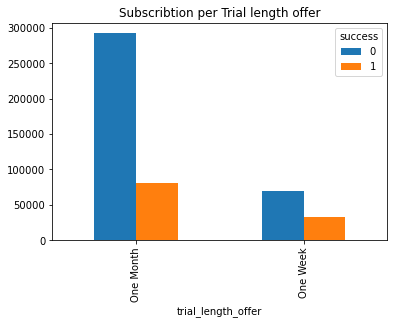

In [10]:
info1.plot(kind = "bar", title= "Subscribtion per Trial length offer")

In [11]:
info2 = pd.pivot_table(df_main[['sub_utm_channel', 'success']], index=['sub_utm_channel'], 
               columns=['success'], aggfunc=len, fill_value=0)

<AxesSubplot:title={'center':'Subscribtion per Channel'}, xlabel='sub_utm_channel'>

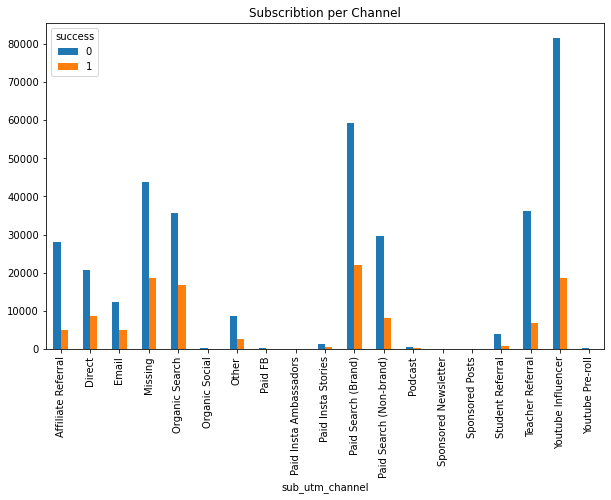

In [12]:
info2.plot(kind = "bar", figsize = (10,6), title= "Subscribtion per Channel")

# Cleaning the data for Clustering

In [13]:
# checking for NA values in order to clean the data

df_main.isna().sum()

# we see lots of NA values in last features

user_uid                             0
create_time                          0
success                              0
cancellation_time                    0
payment_provider_cat_codes           0
payment_ux_cat_codes                 0
trial_length_offer_cat_codes         0
sub_utm_channel_cat_codes            0
sub_utm_source_cat_codes             0
trial_start_day                      0
trial_end_day                        0
is_cancel_during_trial               0
day-1                                0
day-2                                0
day-3                                0
day-4                                0
day-5                                0
day-6                                0
day-7                                0
day-8                                0
day-9                                0
day-10                               0
day-11                               0
day-12                               0
day-13                               0
day-14                   

In [14]:
# extracting necessary data for K-means --- taking only numeric variables and variables with less NA values

df_for_clustering = df_main.loc[df_main["payment_ux_cat_codes"]>=0].iloc[:,12:52]
df_for_clustering = df_for_clustering.drop(['comment_volume', 'comment_score', 
                                                   'discussion_volume', 'discussion_score'
                                                   ], axis=1).dropna()

#df_for_clustering_cleaned2 = df_for_clustering.drop(['comment_volume', 'comment_score'], axis=1).dropna()

In [15]:
df_main.keys()

Index(['user_uid', 'create_time', 'success', 'cancellation_time',
       'payment_provider_cat_codes', 'payment_ux_cat_codes',
       'trial_length_offer_cat_codes', 'sub_utm_channel_cat_codes',
       'sub_utm_source_cat_codes', 'trial_start_day', 'trial_end_day',
       'is_cancel_during_trial', 'day-1', 'day-2', 'day-3', 'day-4', 'day-5',
       'day-6', 'day-7', 'day-8', 'day-9', 'day-10', 'day-11', 'day-12',
       'day-13', 'day-14', 'day-15', 'day-16', 'day-17', 'day-18', 'day-19',
       'day-20', 'day-21', 'day-22', 'day-23', 'day-24', 'day-25', 'day-26',
       'day-27', 'day-28', 'day-29', 'day-30', 'day-31', 'comment_volume',
       'comment_score', 'discussion_volume', 'discussion_score',
       'follow_volume', 'projects_volume', 'projects_score', 'review_volume',
       'rating_avg', 'payment_ux', 'trial_length_offer', 'sub_utm_channel'],
      dtype='object')

In [16]:
# by getting rid of NA values we got data with 452 observations

print(df_for_clustering.shape)

(452, 36)


# Scaling the data and performing PCA

In [17]:
# now we need to standardize the values in columns, so we don't have problem with scales
scaled_data = df_for_clustering.copy()
scaled_array = StandardScaler().fit_transform(df_for_clustering)
scaled_data.loc[:, scaled_data.columns] = scaled_array

In [18]:
scaled_data.head()

,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,...,day-27,day-28,day-29,day-30,day-31,follow_volume,projects_volume,projects_score,review_volume,rating_avg
1132,0.412180,-0.727729,-0.655518,-0.560758,0.274451,0.524869,-0.525812,-0.266352,-0.485601,0.243141,...,1.786179,1.976004,-0.302616,-0.360500,1.467203,1.161699,1.318105,-0.337523,0.626420,0.709012
2603,-0.542760,-0.727729,0.457708,-0.560758,-0.562956,0.055606,1.720342,-0.499891,-0.498925,-0.415722,...,-0.342097,-0.377083,-0.351342,-0.276183,-0.318578,-0.048181,-0.446308,-0.337523,-0.492718,-1.318165
2653,-0.254128,0.143535,0.569316,0.802656,-0.562956,-0.567779,2.229378,-0.499891,0.501698,-0.046725,...,-0.342097,1.186719,1.117906,-0.360500,-0.318578,-0.451474,-0.446308,-0.337523,-0.492718,0.709012
2748,-0.813584,-0.727729,-0.073698,-0.560758,-0.562956,1.137911,-0.526508,-0.499891,-0.498925,-0.477927,...,-0.342097,-0.377083,-0.351342,0.356391,-0.318578,-0.451474,-0.446308,-0.337523,-0.492718,-1.318165
3460,1.314031,0.129629,1.410815,-0.428175,-0.562956,1.005855,-0.097096,-0.499891,-0.498925,-0.477927,...,-0.046112,2.817416,1.680232,-0.360500,0.040844,-0.249828,-0.446308,-0.337523,0.066851,-2.331753


In [19]:
# Running Principal Components Analysis in order to find most important features

pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(scaled_data)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))

print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

# we got that by reducing dimension of features we still maintain roughly 35% of our original data

Explained variation per principal component: [0.29042634 0.05900519]
Cumulative variance explained by 2 principal components: 34.94%


In [20]:
# Results from pca.components --- finding most important features

dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=scaled_data.columns, 
                           index=['PC_1', 'PC_2'])
print('\n\n', dataset_pca)



          day-1     day-2     day-3     day-4     day-5     day-6     day-7  \
PC_1  0.142604  0.120926  0.153715  0.179817  0.158221  0.165040  0.182852   
PC_2  0.014941  0.043816  0.061735  0.053126  0.082047  0.184113  0.040794   

         day-8     day-9    day-10  ...    day-27    day-28    day-29  \
PC_1  0.181815  0.159827  0.161402  ...  0.204800  0.168825  0.184236   
PC_2  0.089418  0.098553  0.227311  ...  0.140281  0.295261  0.265990   

        day-30    day-31  follow_volume  projects_volume  projects_score  \
PC_1  0.156963  0.146729       0.072020         0.099355        0.013815   
PC_2  0.267946  0.247659       0.192206         0.229461        0.083171   

      review_volume  rating_avg  
PC_1       0.135825    0.034607  
PC_2       0.215455    0.090453  

[2 rows x 36 columns]


In [21]:
print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.2].iloc[0]).dropna())

As per PC 1:
 day-25    0.210817
day-26    0.211629
day-27    0.204800
Name: PC_1, dtype: float64


In [22]:
print('As per PC 2:\n', (dataset_pca[dataset_pca > 0.25].iloc[1]).dropna())

As per PC 2:
 day-28    0.295261
day-29    0.265990
day-30    0.267946
Name: PC_2, dtype: float64


# Performing K-means clustering

In [23]:
# finding the optimal number of clusters

# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 6]
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)   
    kmeans_model.fit(scaled_data) 
    ss = metrics.silhouette_score(scaled_data, kmeans_model.labels_)   
    silhouette_scores += [ss]     
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p


Parameter: {'n_clusters': 2} Score 0.5494592976454078
Parameter: {'n_clusters': 3} Score 0.2784510869829641
Parameter: {'n_clusters': 4} Score 0.2659230653771705
Parameter: {'n_clusters': 5} Score 0.245839572605324
Parameter: {'n_clusters': 6} Score 0.244041497106784


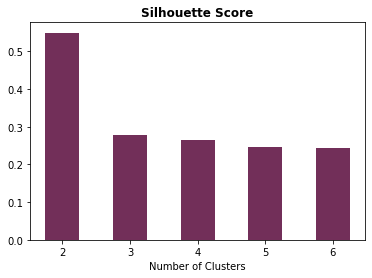

In [24]:
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

In [25]:
# we saw that Kmeans with 2 clusters has the highest score, so we'll continue the analysis by 
# setting number of clusters = 2

kmeans = KMeans(n_clusters=2)    
kmeans.fit(scaled_data)

KMeans(n_clusters=2)

In [26]:
centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

/usr/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


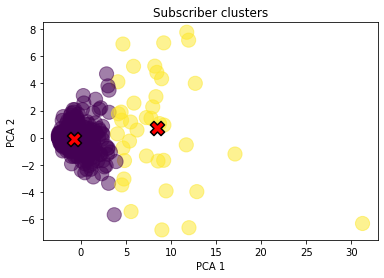

In [27]:
x = pca_2_result[:, 0]
y = pca_2_result[:, 1]

plt.scatter(x, y, c=kmeans.labels_, alpha=0.5, s=200)  # plot different colors per cluster
plt.title('Subscriber clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5,
                color='red', edgecolors="black", lw=1.5)

plt.show()

In [28]:
clustered_data = df_for_clustering.copy()
clustered_data["labels"] = kmeans.labels_

In [29]:
clustered_data.head()

,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,...,day-28,day-29,day-30,day-31,follow_volume,projects_volume,projects_score,review_volume,rating_avg,labels
1132,3770.0,0.0,128.0,0.0,2660.0,3169.0,2.0,675.0,31.0,1704.0,...,5417.0,111.0,0.0,3468.0,9.0,4.0,0.0,3.0,4.0,0
2603,928.0,0.0,3639.0,0.0,0.0,1808.0,6462.0,0.0,0.0,147.0,...,0.0,0.0,213.0,0.0,3.0,1.0,0.0,1.0,3.0,0
2653,1787.0,3446.0,3991.0,4535.0,0.0,0.0,7926.0,0.0,2328.0,1019.0,...,3600.0,3347.0,0.0,0.0,1.0,1.0,0.0,1.0,4.0,0
2748,122.0,0.0,1963.0,0.0,0.0,4947.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1811.0,0.0,1.0,1.0,0.0,1.0,3.0,0
3460,6454.0,3391.0,6645.0,441.0,0.0,4564.0,1235.0,0.0,0.0,0.0,...,7354.0,4628.0,0.0,698.0,2.0,1.0,0.0,2.0,2.5,0


In [30]:
# we can look at the data grouped for each label
clustered_data.groupby('labels').agg(['median' ,'mean']).T

labels                           0            1
day-1          median  1554.000000  4071.000000
               mean    2250.062954  5648.717949
day-2          median  1521.000000  5886.000000
               mean    2459.665860  7311.461538
day-3          median   546.000000  6536.000000
...                            ...          ...
projects_score mean       0.150121     0.205128
review_volume  median     1.000000     2.000000
               mean       1.668281     4.128205
rating_avg     median     4.000000     4.000000
               mean       3.639790     3.760976

[72 rows x 2 columns]

## K-prototype for categorical variables. 

In [31]:
from kmodes.kprototypes import KPrototypes

ModuleNotFoundError: No module named 'kmodes'

In [ ]:
df_for_clustering2 = df_main.loc[df_main["payment_ux_cat_codes"]>=0].loc[:,['sub_utm_channel', 'payment_ux',
                                                                         'trial_length_offer', 'day-1']].dropna()


#array_1 = df_success_sample[['sub_utm_channel', 'trial_length_offer', 'day-1']].values
#categorical_index = [0, 1]

In [ ]:
print(df_for_clustering2.shape)
df_for_clustering2.head()

In [ ]:
# now we need to standardize the values in columns, so we don't have problem with scales
sample_for_clustering2 = df_for_clustering2.sample(frac=0.1, replace=False, random_state=1)
scaled_sample2 = sample_for_clustering2.copy()
scaled_array2 = StandardScaler().fit_transform(sample_for_clustering2[['day-1']])
scaled_sample2.loc[:, 'day-1'] = scaled_array2

In [ ]:
print(scaled_sample2.shape)
scaled_sample2.head()

In [ ]:
# dataframe to an array...changed to sample data
array_1 = scaled_sample2.values
categorical_index = [0, 1, 2]

model_2 = KPrototypes(n_clusters=2, init='Huang', random_state=42, n_jobs=-1)
model_2.fit_predict(array_1, categorical=categorical_index)
print(model_2.cost_)

In [ ]:
sample2_labeled = sample_for_clustering2.copy()
sample2_labeled.loc[:,'labels'] = model_2.labels_

In [ ]:
sample2_labeled.shape

In [ ]:
import plotly.express as px

fig = px.scatter(sample2_labeled.sample(frac=0.01, replace=False, random_state=1)
                 , x="day-1", y="labels", color='labels')
fig.show()

In [ ]:
#fig2 = px.scatter(sample2_labeled.sample(frac=0.01, replace=False, random_state=1)
                 #, x="sub_utm_channel", y="labels", color='labels')
#fig2.show()

In [ ]:
# WIP